In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df=pd.read_excel('../Dataset/Dataset.xlsx')
df.head()

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29,Excavator_1,Engine,Temparature,104.0
1,5,2022-05-12 02:05:42,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,24,2022-05-27 06:25:04,Articulated_Truck_1,Engine,Temparature,104.0
3,23,2022-05-12 20:36:47,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,42,2022-06-28 04:06:30,Excavator_1,Engine,Oil Pressure,39.0


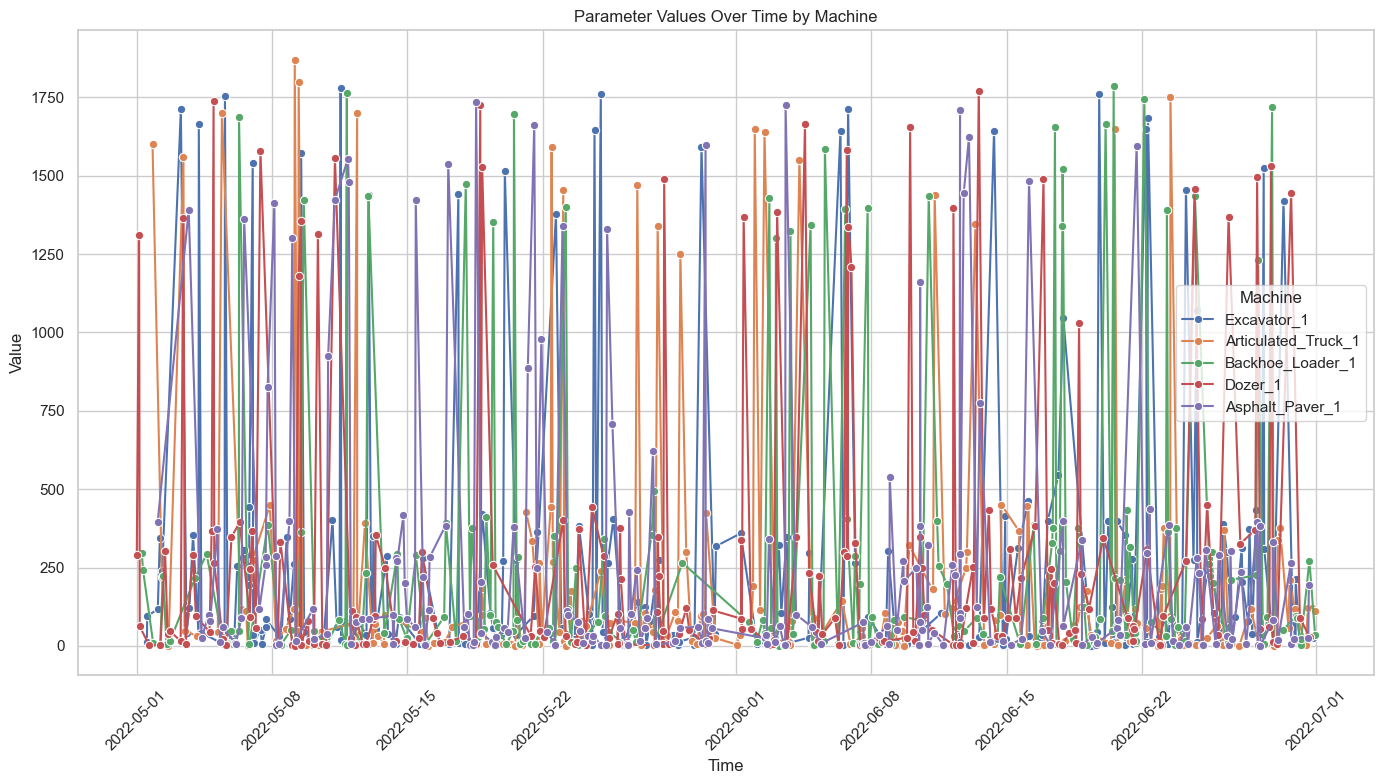

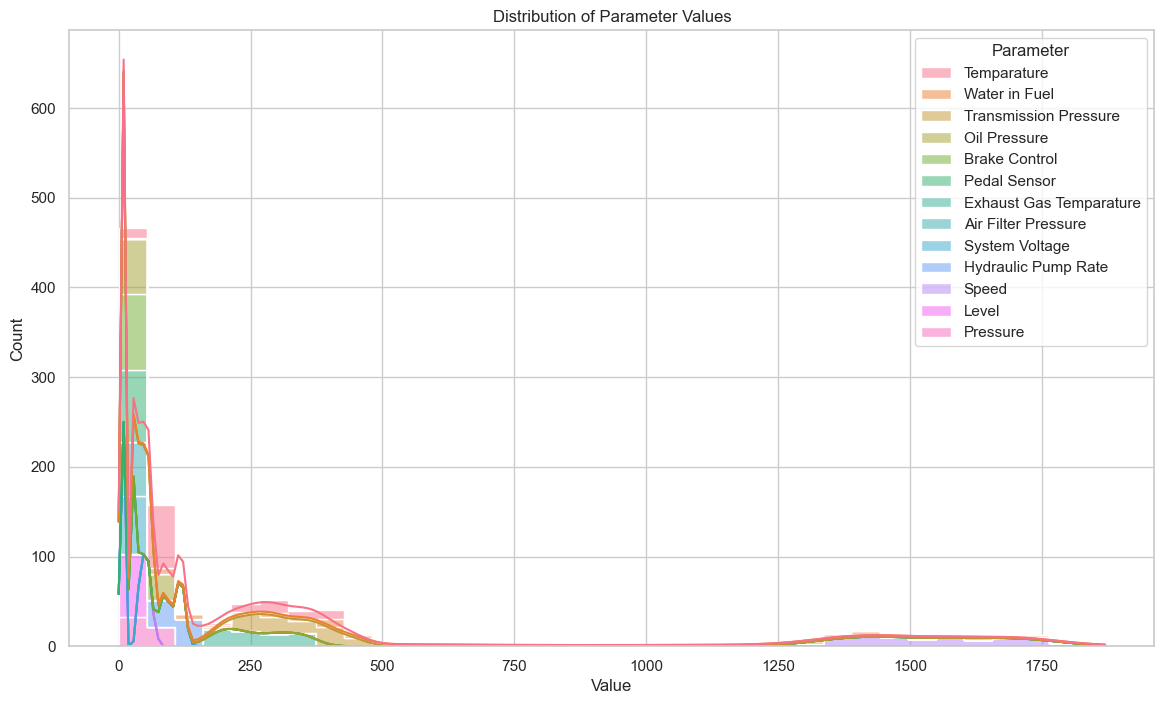

/var/folders/06/g6p20x7x0mzf40xrgbq7xyg40000gn/T/ipykernel_78640/567964092.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
/var/folders/06/g6p20x7x0mzf40xrgbq7xyg40000gn/T/ipykernel_78640/567964092.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


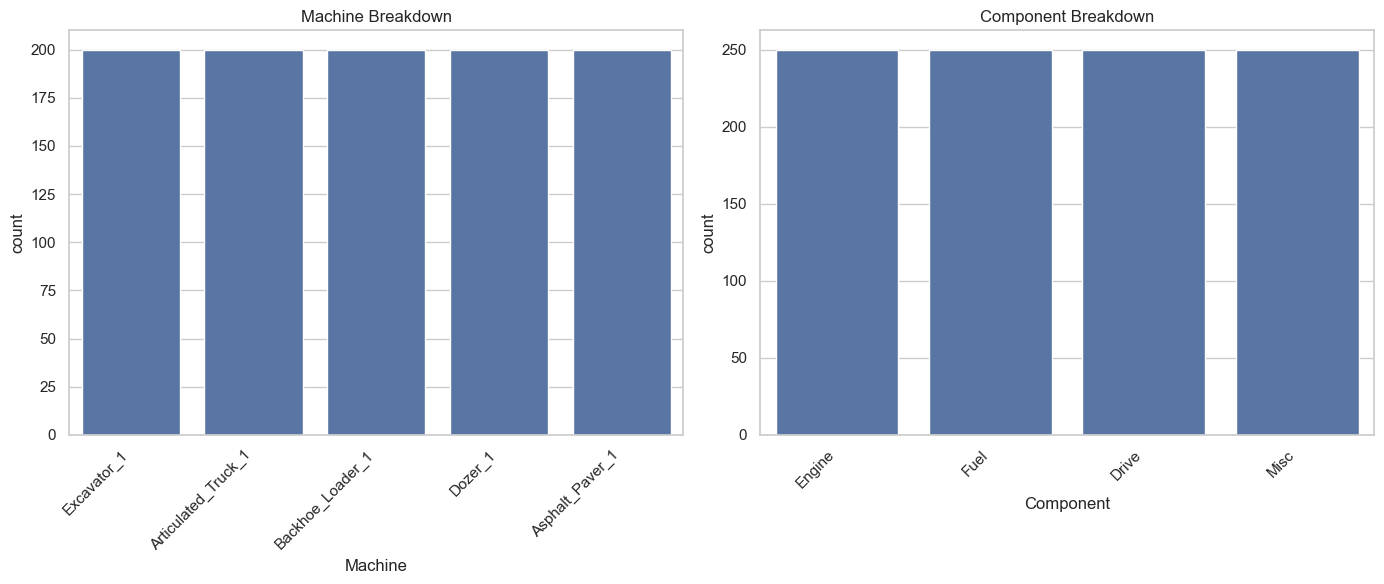

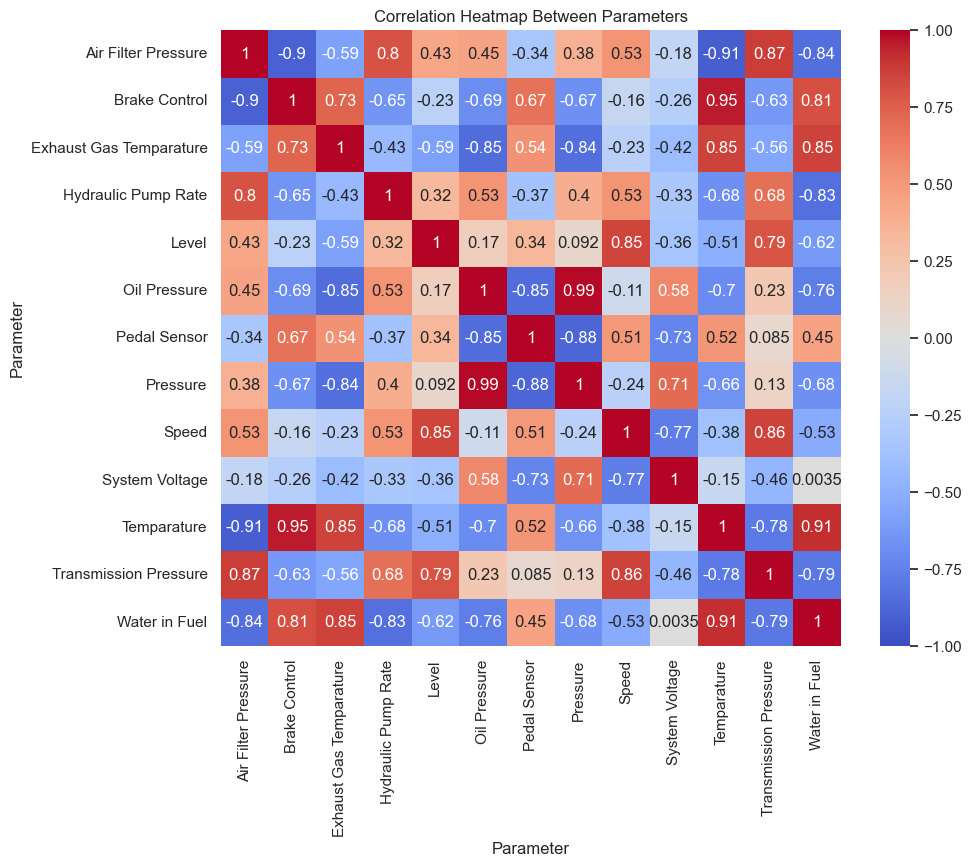

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
save_dir = "../graphs"
os.makedirs(save_dir, exist_ok=True)

sns.set(style="whitegrid")

# 1. Time Series: Visualizing the change of parameter values over time for each machine
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Time', y='Value', hue='Machine', marker='o')
plt.title('Parameter Values Over Time by Machine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'time_series_by_machine.png'))
plt.show()

# 2. Distribution of Parameters: Histograms for each parameter
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='Value', hue='Parameter', element='step', multiple='stack', kde=True)
plt.title('Distribution of Parameter Values')
plt.savefig(os.path.join(save_dir, 'parameter_value_distribution.png'))
plt.show()

# 3. Machine and Component Breakdown: Count plots for Machines and Components
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='Machine', ax=axes[0])
axes[0].set_title('Machine Breakdown')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(data=df, x='Component', ax=axes[1])
axes[1].set_title('Component Breakdown')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'machine_component_breakdown.png'))
plt.show()

# 4. Correlation Heatmap: Correlation between numeric values
df_pivot = pd.pivot_table(df, values='Value', index='Machine', columns='Parameter')

plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Parameters')
plt.savefig(os.path.join(save_dir, 'correlation_heatmap.png'))
plt.show()

In [4]:
df.drop(['Id','Time'],inplace=True,axis=1)

In [5]:
df.head()

,Machine,Component,Parameter,Value
0,Excavator_1,Engine,Temparature,104.0
1,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,Articulated_Truck_1,Engine,Temparature,104.0
3,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,Excavator_1,Engine,Oil Pressure,39.0


In [6]:
df['Machine'].value_counts()

Machine
Excavator_1            200
Articulated_Truck_1    200
Backhoe_Loader_1       200
Dozer_1                200
Asphalt_Paver_1        200
Name: count, dtype: int64

In [7]:
df['Component'].value_counts()

Component
Engine    250
Fuel      250
Drive     250
Misc      250
Name: count, dtype: int64

In [8]:
df['Parameter'].unique()

array(['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure'], dtype=object)

In [9]:
# Thresholds with ideal ranges
thresholds = {
    'Engine Oil Pressure': {'Low': 25, 'High': 65},
    'Engine Speed': {'High': 1800},
    'Engine Temperature': {'High': 105},
    'Fuel Pressure': {'Low': 35, 'High': 65},
    'Hydraulic Pump Rate': {'High': 125},
    'Transmission Pressure': {'Low': 200, 'High': 450},
    'Air Filter Pressure': {'Low': 20},
    'Exhaust Gas Temperature': {'High': 365},
    'System Voltage': {'Low': 12.0, 'High': 15.0},
    'Brake Control': {'High': 1},
    'Pedal Sensor': {'Low': 4.7},
    'Level': {'High': 1},
    'Speed': {'High': 1800}
}

def calculate_probability(param, value):
    threshold = thresholds.get(param, {})
    low = threshold.get('Low', None)
    high = threshold.get('High', None)
    if low is not None and high is not None:
        low_probability = (low - value) / low
        high_probability = (value - high) / high
        probability = max(low_probability, high_probability)
    elif low is not None:
        # Calculate probability for below low threshold
        probability = (low - value) / low
    elif high is not None :
        # Calculate probability for above high threshold
        probability = (value - high) / high
    else:
        # If value is within the threshold range
        probability = 0.1  # Low probability within range
    
    return probability

# Apply the probability calculation to the DataFrame
df['Probability of Failure'] = df.apply(lambda row: calculate_probability(row['Parameter'], row['Value']), axis=1)

# Display the result
print(df[['Parameter', 'Value', 'Probability of Failure']])

                   Parameter  Value  Probability of Failure
0                Temparature  104.0                   0.100
1              Water in Fuel   70.0                   0.100
2                Temparature  104.0                   0.100
3      Transmission Pressure  231.0                  -0.155
4               Oil Pressure   39.0                   0.100
..                       ...    ...                     ...
995  Exhaust Gas Temparature  263.0                   0.100
996                    Level    7.0                   6.000
997      Air Filter Pressure   23.0                  -0.150
998      Air Filter Pressure   26.0                  -0.300
999  Exhaust Gas Temparature  195.0                   0.100

[1000 rows x 3 columns]


In [10]:
df['Probability of Failure'] = df['Probability of Failure'].apply(lambda x: -x if x < 0 else x)

In [11]:
# Initialize the 'Status' column with a default value (optional)
df['Status'] = 'Unknown'

# Apply conditions to update the 'Status' column based on 'Probability of Failure'
df.loc[df['Probability of Failure'] <= 0.3, 'Status'] = 'Low Risk'
df.loc[(df['Probability of Failure'] > 0.3) & (df['Probability of Failure'] <= 0.65), 'Status'] = 'Medium Risk'
df.loc[df['Probability of Failure'] > 0.65, 'Status'] = 'High Risk'

In [12]:
df.head(10)

,Machine,Component,Parameter,Value,Probability of Failure,Status
0,Excavator_1,Engine,Temparature,104.000000,0.100000,Low Risk
1,Articulated_Truck_1,Fuel,Water in Fuel,70.000000,0.100000,Low Risk
2,Articulated_Truck_1,Engine,Temparature,104.000000,0.100000,Low Risk
3,Backhoe_Loader_1,Drive,Transmission Pressure,231.000000,0.155000,Low Risk
4,Excavator_1,Engine,Oil Pressure,39.000000,0.100000,Low Risk
5,Dozer_1,Fuel,Temparature,215.000000,0.100000,Low Risk
6,Backhoe_Loader_1,Fuel,Temparature,202.000000,0.100000,Low Risk
7,Articulated_Truck_1,Drive,Brake Control,2.000000,1.000000,High Risk
8,Excavator_1,Drive,Pedal Sensor,4.533982,0.035323,Low Risk
9,Articulated_Truck_1,Drive,Pedal Sensor,3.900000,0.170213,Low Risk


In [13]:
df.tail(10)

,Machine,Component,Parameter,Value,Probability of Failure,Status
990,Asphalt_Paver_1,Fuel,Temparature,383.0,0.100000,Low Risk
991,Asphalt_Paver_1,Fuel,Level,1.0,0.000000,Low Risk
992,Asphalt_Paver_1,Engine,Temparature,81.0,0.100000,Low Risk
993,Asphalt_Paver_1,Drive,Transmission Pressure,332.0,0.262222,Low Risk
994,Asphalt_Paver_1,Misc,Air Filter Pressure,20.0,0.000000,Low Risk
995,Asphalt_Paver_1,Misc,Exhaust Gas Temparature,263.0,0.100000,Low Risk
996,Asphalt_Paver_1,Fuel,Level,7.0,6.000000,High Risk
997,Asphalt_Paver_1,Misc,Air Filter Pressure,23.0,0.150000,Low Risk
998,Asphalt_Paver_1,Misc,Air Filter Pressure,26.0,0.300000,Low Risk
999,Asphalt_Paver_1,Misc,Exhaust Gas Temparature,195.0,0.100000,Low Risk


In [14]:
filePath = '../Dataset/Refined_Dataset.csv';
df.to_csv(filePath,index=False)

Value Skewness: 2.146884970446572
Value Kurtosis: 3.221246953882384


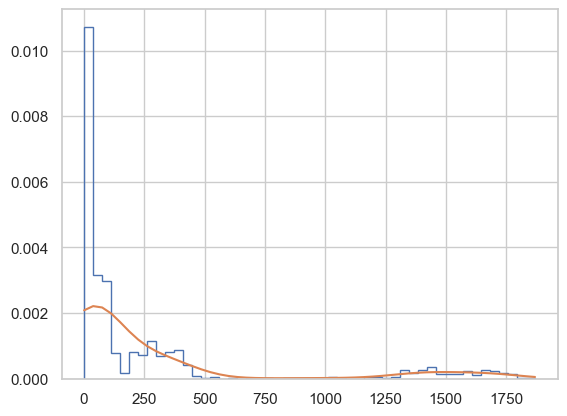



Probability of Failure Skewness: 2.821723893061915
Probability of Failure Kurtosis: 6.9871219205878905


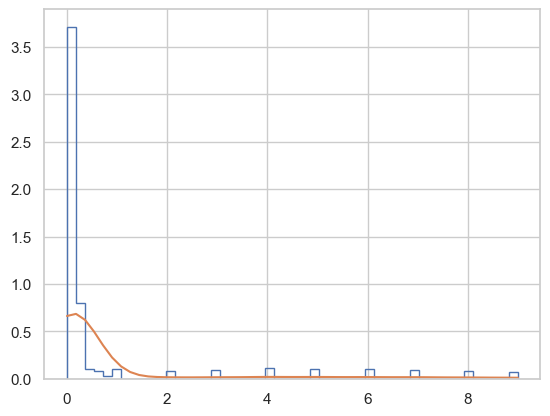

In [15]:
import scipy.stats as stats
numerical_columns= df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    print(df[column].name + " Skewness: " + str(df[column].skew()))
    print(df[column].name + " Kurtosis: " + str(df[column].kurt()))
    density = stats.gaussian_kde(df[column])
    n, x, _ = plt.hist(df[column], bins=50, histtype=u'step', density=True)
    plt.plot(x, density(x))
    plt.show()
    print('\n')

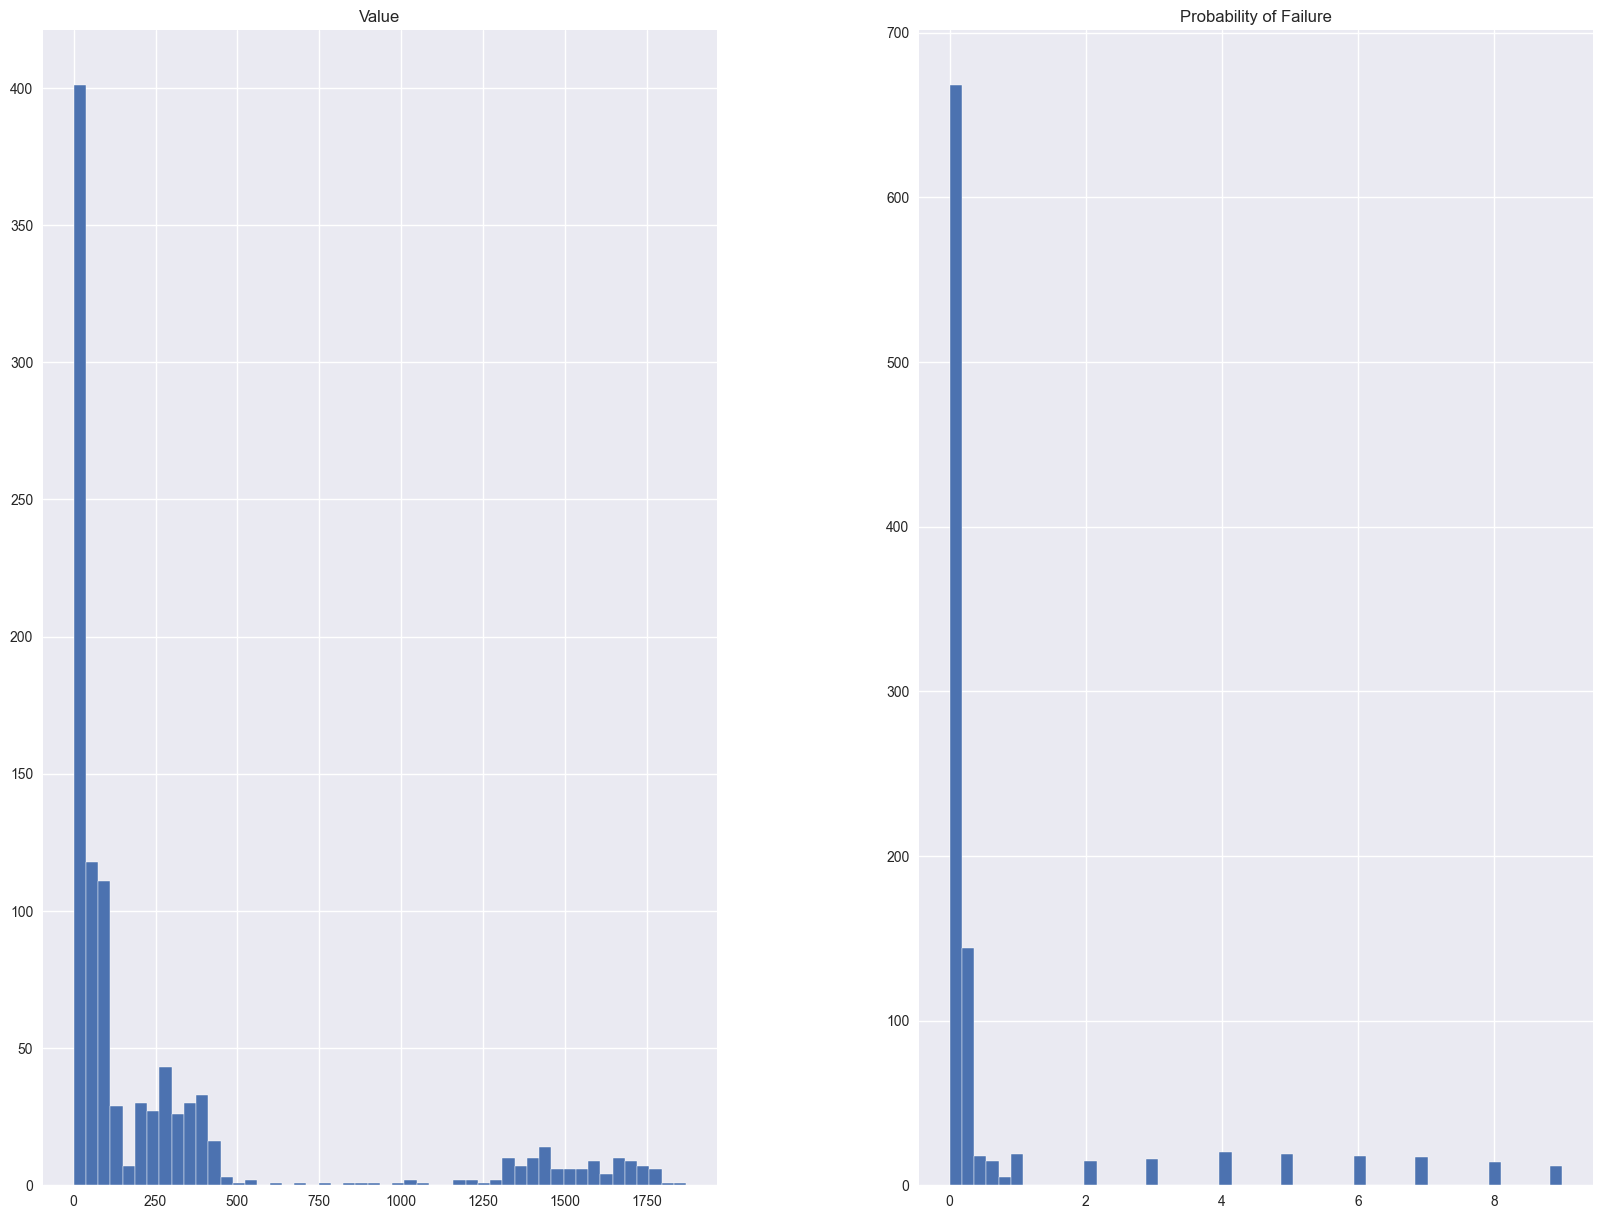

In [16]:
# Plot density plot for all features
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
df['Parameter'].unique()

array(['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure'], dtype=object)

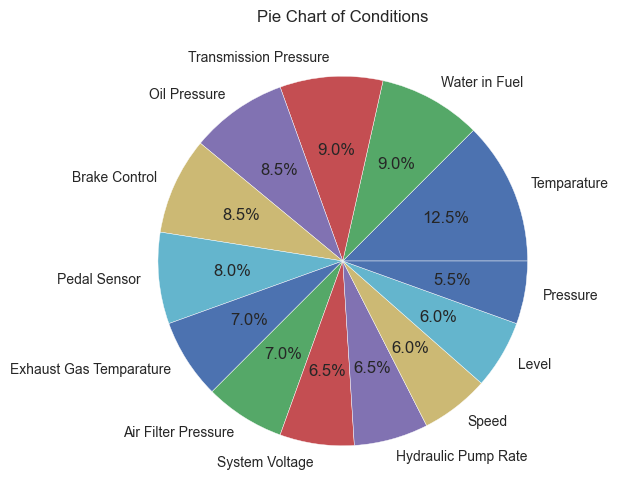

In [18]:
percentage=df['Parameter'].value_counts(normalize=True)*100
classlabels= ['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure']
plt.figure(figsize=(12,6))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Conditions')
plt.show()

In [19]:
df[['Value','Probability of Failure']].corr()

,Value,Probability of Failure
Value,1.000000,-0.207086
Probability of Failure,-0.207086,1.000000


<Axes: >

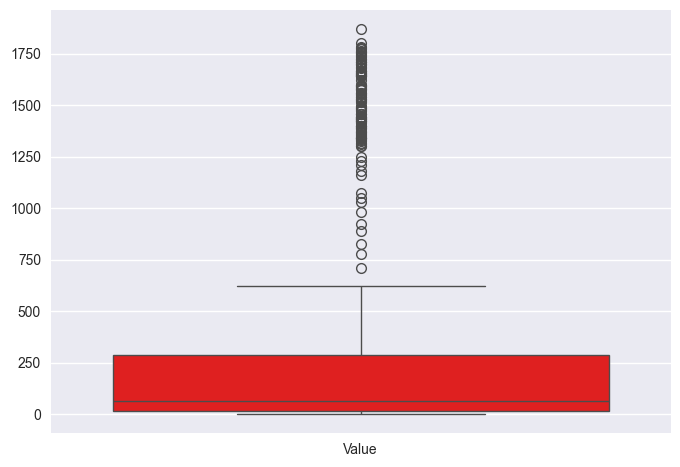

In [20]:
sns.boxplot(df[['Value']],color='red')